In [1]:
# Import libraries
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [2]:
# Get data files
# !wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

# !unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

In [3]:
# Import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep = ";",
    header = 0,
    names = ['isbn', 'title', 'author'],
    usecols = ['isbn', 'title', 'author'],
    dtype = {'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep = ";",
    header = 0,
    names = ['user', 'isbn', 'rating'],
    usecols = ['user', 'isbn', 'rating'],
    dtype = {'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [4]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   isbn    271379 non-null  object
 1   title   271379 non-null  object
 2   author  271378 non-null  object
dtypes: object(3)
memory usage: 6.2+ MB


In [5]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   user    1149780 non-null  int32  
 1   isbn    1149780 non-null  object 
 2   rating  1149780 non-null  float32
dtypes: float32(1), int32(1), object(1)
memory usage: 17.5+ MB


In [6]:
# Checking for missing values in df_books
books_null0 = df_books.isnull().sum()
print(books_null0)
missing_author = df_books.loc[df_books['author'].isnull()]
print(missing_author)
df_books = df_books.dropna(subset=['author'])
books_null1 = df_books.isnull().sum()
print(books_null1)

isbn      0
title     0
author    1
dtype: int64
              isbn                                              title author
187700  9627982032  The Credit Suisse Guide to Managing Your Perso...    NaN
isbn      0
title     0
author    0
dtype: int64


In [7]:
# Checking for missing values in df_ratings
ratings_null = df_ratings.isnull().sum()
print(ratings_null)

user      0
isbn      0
rating    0
dtype: int64


In [8]:
# Check for duplicates in the data
duplicates0 = df_books['title'].duplicated().sum()
print(duplicates0)
df_books_cleaned = df_books.drop_duplicates(subset = ['title'])
duplicates1 = df_books_cleaned['title'].duplicated().sum()
print(duplicates1)

29225
0


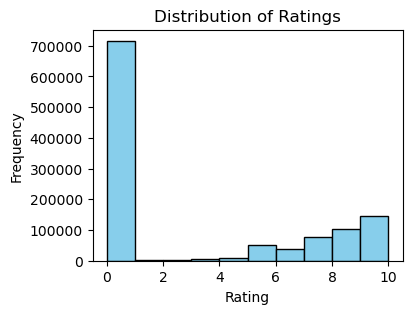

In [9]:
# Plotting the distribution of ratings
plt.figure(figsize=(4, 3))
plt.hist(df_ratings['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

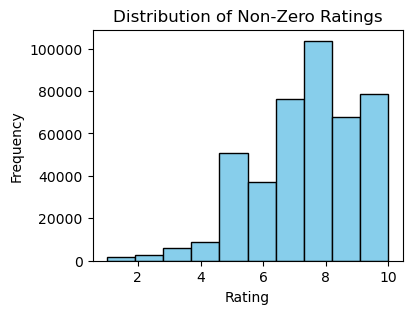

In [10]:
# Filter out 0 ratings
non_zero_ratings = df_ratings[df_ratings['rating'] != 0]

# Plotting the distribution of non-zero ratings
plt.figure(figsize=(4, 3))
plt.hist(non_zero_ratings['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Non-Zero Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [11]:
# To ensure statistical significance, removing from the dataset users with less than 200 ratings
# and books with less than 100 ratings.
user_ratings_count = df_ratings.groupby('user').size()   # Counts ratings per user
book_ratings_count = df_ratings.groupby('isbn').size()    # Counts ratings per book

# New filtered df
df_filtered = df_ratings[
    df_ratings['user'].isin(user_ratings_count[user_ratings_count >= 200].index) &
    df_ratings['isbn'].isin(book_ratings_count[book_ratings_count >= 100].index)]
print(df_ratings.shape)
print(df_filtered.shape)

(1149780, 3)
(49781, 3)


In [12]:
# Merging dataframes
merged_df = pd.merge(left = df_books_cleaned, right = df_filtered, on='isbn')
df = merged_df.drop_duplicates(["title", "user"])
# Display the merged DataFrame
df.head()

,isbn,title,author,user,rating
0,0440234743,The Testament,John Grisham,277478,0.0
1,0440234743,The Testament,John Grisham,2977,0.0
2,0440234743,The Testament,John Grisham,3363,0.0
3,0440234743,The Testament,John Grisham,7346,9.0
4,0440234743,The Testament,John Grisham,9856,0.0


In [13]:
print(df.shape)

(40804, 5)


In [14]:
# Creating a pivot table
pivot = df.pivot(index ='title', columns ='user', values ='rating').fillna(0)
pivot.head()

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Creating a matrix from pivot table values
matrix = pivot.values
matrix.shape

(594, 887)

In [16]:
# Building the KNN model
model_knn = NearestNeighbors(metric ='cosine', algorithm ='brute')
model_knn.fit(matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [17]:
# Function to return recommended books - this will be tested
def get_recommends(book = "", k = 5):
    x = pivot.loc[book].array.reshape(1, -1)
    distances, indices = model_knn.kneighbors(x,n_neighbors = 6)
    R_books = []
    for distance,indice in zip(distances[0],indices[0]):
        if distance != 0:
            R_book = pivot.index[indice]
            R_books.append([R_book,distance])
    recommended_books = [book,R_books[::-1]]
    return recommended_books

In [18]:
# Testing function with prompt example
get_recommends("The Queen of the Damned (Vampire Chronicles (Paperback))")

['The Queen of the Damned (Vampire Chronicles (Paperback))',
 [['Catch 22', 0.7939835],
  ['The Witching Hour (Lives of the Mayfair Witches)', 0.74486566],
  ['Interview with the Vampire', 0.73450685],
  ['The Tale of the Body Thief (Vampire Chronicles (Paperback))', 0.53763384],
  ['The Vampire Lestat (Vampire Chronicles, Book II)', 0.51784116]]]

In [19]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2): 
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", [["I'll Be Seeing You", 0.8016211], ['The Weight of Water', 0.77085835], ['The Surgeon', 0.7699411], ['I Know This Much Is True', 0.7677075], ['The Lovely Bones: A Novel', 0.7234864]]]
You passed the challenge! 🎉🎉🎉🎉🎉
